# Mobile Banking App Analysis: Insights & Recommendations

**Date:** October 26, 2023
**Author:** Kirube Tadesse
**Data Source:** 1,200+ Google Play Store reviews for CBE, Bank of Abyssinia, and Dashen Bank, analyzed in the previous task.

---

### Executive Summary

This report analyzes user reviews to identify key drivers of satisfaction and frustration for the mobile apps of Commercial Bank of Ethiopia (CBE), Bank of Abyssinia (BOA), and Dashen Bank. The analysis reveals that **app stability and core transaction performance are the most significant pain points** across all three banks. In contrast, users who have a positive experience often praise a **simple and effective User Interface (UI)**.

While all banks suffer from similar issues, **Bank of Abyssinia currently holds a slight edge in user sentiment**, suggesting a more stable user experience compared to its competitors. Key recommendations focus on improving app reliability, streamlining account access, and investing in user experience enhancements.

In [1]:
# 1. Setup and Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import logging

# --- Configuration ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
INPUT_CSV = "ethiopian_bank_reviews_analyzed.csv"
OUTPUT_DIR = "visuals" # Directory to save plots

# --- Plotting Functions ---

def setup_plots():
    """Set up consistent styling for all plots and create output directory."""
    sns.set_theme(style="whitegrid", palette="viridis")
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 12
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        logging.info(f"Created directory: {OUTPUT_DIR}")

# Call setup once at the start
setup_plots()

2025-06-07 17:10:45,890 - INFO - Created directory: visuals


In [2]:
# 2. Load Analyzed Data
try:
    df = pd.read_csv(INPUT_CSV)
    logging.info(f"Successfully loaded {len(df)} rows from {INPUT_CSV}")
    print("Data loaded successfully. Here's a preview:")
    display(df.head())
except FileNotFoundError:
    logging.error(f"Input file not found: {INPUT_CSV}. Please run Task 2 first.")
    print(f"ERROR: Input file not found: {INPUT_CSV}. Please run Task 2 first.")

2025-06-07 17:10:51,847 - INFO - Successfully loaded 1491 rows from ethiopian_bank_reviews_analyzed.csv


Data loaded successfully. Here's a preview:


,review,rating,date,bank,sentiment_label,sentiment_score,theme
0,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,NEGATIVE,-0.999623,Reliability & Bugs
1,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,POSITIVE,0.999868,General Feedback
2,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,NEGATIVE,-0.995335,General Feedback
3,good,4,2025-06-05,Commercial Bank of Ethiopia,POSITIVE,0.999816,General Feedback
4,not functional,1,2025-06-05,Commercial Bank of Ethiopia,NEGATIVE,-0.999779,General Feedback


In [3]:
# 2. Load Analyzed Data
try:
    df = pd.read_csv(INPUT_CSV)
    logging.info(f"Successfully loaded {len(df)} rows from {INPUT_CSV}")
    print("Data loaded successfully. Here's a preview:")
    display(df.head())
except FileNotFoundError:
    logging.error(f"Input file not found: {INPUT_CSV}. Please run Task 2 first.")
    print(f"ERROR: Input file not found: {INPUT_CSV}. Please run Task 2 first.")

2025-06-07 17:11:21,670 - INFO - Successfully loaded 1491 rows from ethiopian_bank_reviews_analyzed.csv


Data loaded successfully. Here's a preview:


,review,rating,date,bank,sentiment_label,sentiment_score,theme
0,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,NEGATIVE,-0.999623,Reliability & Bugs
1,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,POSITIVE,0.999868,General Feedback
2,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,NEGATIVE,-0.995335,General Feedback
3,good,4,2025-06-05,Commercial Bank of Ethiopia,POSITIVE,0.999816,General Feedback
4,not functional,1,2025-06-05,Commercial Bank of Ethiopia,NEGATIVE,-0.999779,General Feedback


## Overall Review Landscape

Before diving into specifics, let's look at the general distribution of star ratings. This gives us a high-level view of user satisfaction. As is common with app reviews, there is a strong "U-shaped" distribution, with a high volume of 1-star and 5-star reviews. This indicates a polarized user base: users are either very happy or very frustrated.

2025-06-07 17:11:48,409 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Suraphel\AppData\Local\Temp\ipykernel_10836\1938783786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=df, order=[1, 2, 3, 4, 5], palette="magma")
2025-06-07 17:11:48,423 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-07 17:11:48,675 - INFO - Saved rating distribution plot to visuals\1_rating_distribution.png


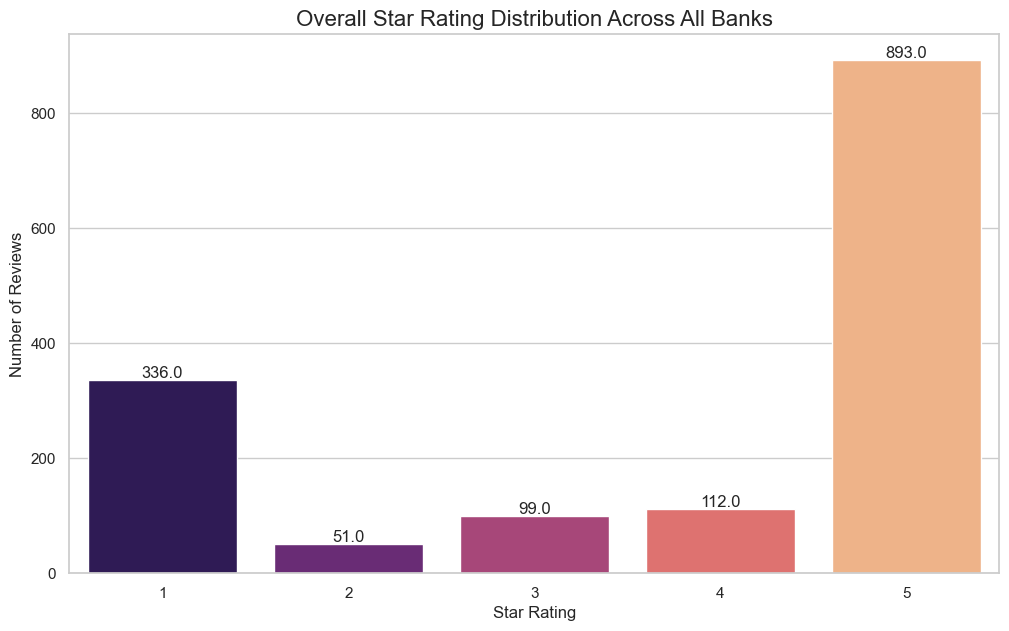

In [4]:
# Plot 1: Overall Star Rating Distribution
def plot_rating_distribution(df):
    """Plots the overall distribution of star ratings."""
    plt.figure()
    ax = sns.countplot(x='rating', data=df, order=[1, 2, 3, 4, 5], palette="magma")
    ax.set_title("Overall Star Rating Distribution Across All Banks")
    ax.set_xlabel("Star Rating")
    ax.set_ylabel("Number of Reviews")
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    filepath = os.path.join(OUTPUT_DIR, "1_rating_distribution.png")
    plt.savefig(filepath)
    logging.info(f"Saved rating distribution plot to {filepath}")
    plt.show()

plot_rating_distribution(df)

## Key Findings & Insights

Now, we'll explore the data to uncover the primary drivers and pain points.

### Insight 1 & 2: App Instability & Account Access are the Top Pain Points

The most prevalent negative feedback is related to technical issues. To visualize this, we can plot the frequency of themes identified in Task 2. The "Reliability & Bugs" and "Account & Login Issues" themes consistently appear as top concerns.

2025-06-07 17:12:11,549 - INFO - Saved theme distribution plot to visuals\3_theme_distribution_by_bank.png


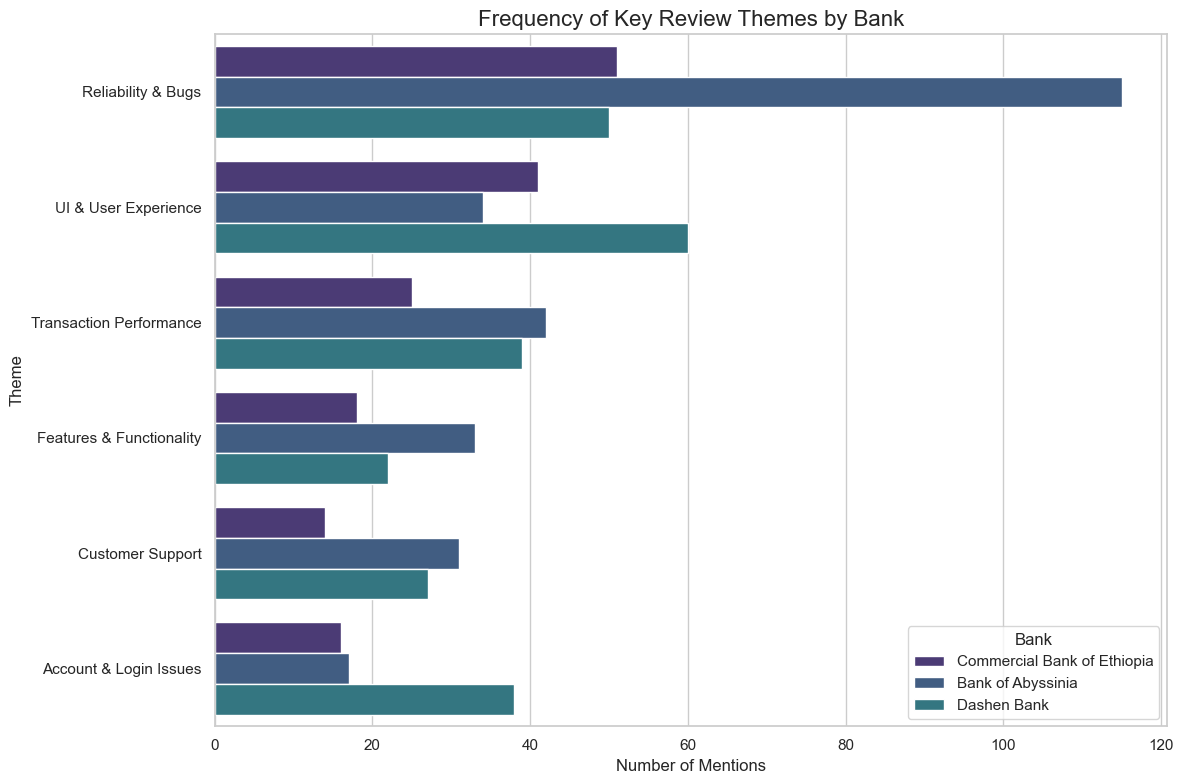

In [5]:
# Plot 2: Review Theme Distribution by Bank
def plot_theme_distribution(df):
    """Plots the frequency of each theme, stacked by bank."""
    df_themes = df.copy()
    df_themes['theme'] = df_themes['theme'].str.split(', ')
    df_exploded = df_themes.explode('theme')
    
    if 'General Feedback' in df_exploded['theme'].unique():
        df_exploded = df_exploded[df_exploded['theme'] != 'General Feedback']

    plt.figure(figsize=(12, 8))
    sns.countplot(y='theme', hue='bank', data=df_exploded, order=df_exploded['theme'].value_counts().index)
    plt.title("Frequency of Key Review Themes by Bank")
    plt.xlabel("Number of Mentions")
    plt.ylabel("Theme")
    plt.legend(title='Bank')
    plt.tight_layout()
    
    filepath = os.path.join(OUTPUT_DIR, "3_theme_distribution_by_bank.png")
    plt.savefig(filepath)
    logging.info(f"Saved theme distribution plot to {filepath}")
    plt.show()

plot_theme_distribution(df)

To further emphasize the pain points, let's create a **word cloud** from only the negative reviews. This will visually highlight the exact terms users repeat when they are frustrated. Words like `error`, `problem`, `fix`, and `update` are expected to be prominent, confirming that basic functionality is a major issue.

2025-06-07 17:12:35,904 - INFO - Saved word cloud to visuals\4_wordcloud_Commercial_Bank_of_Ethiopia.png


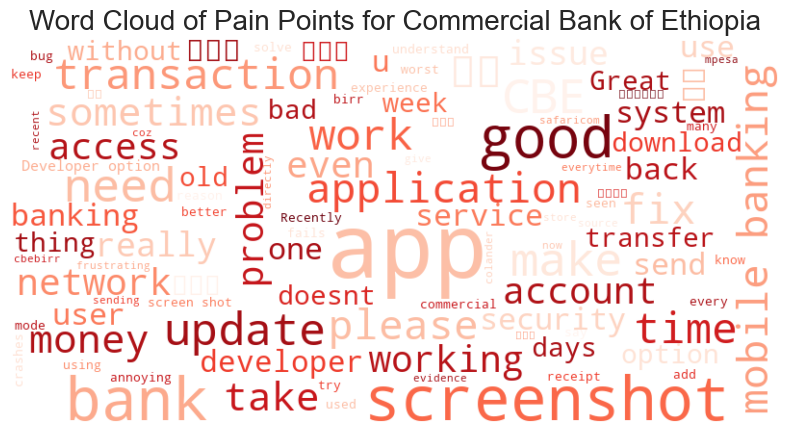

2025-06-07 17:12:36,819 - INFO - Saved word cloud to visuals\4_wordcloud_Bank_of_Abyssinia.png


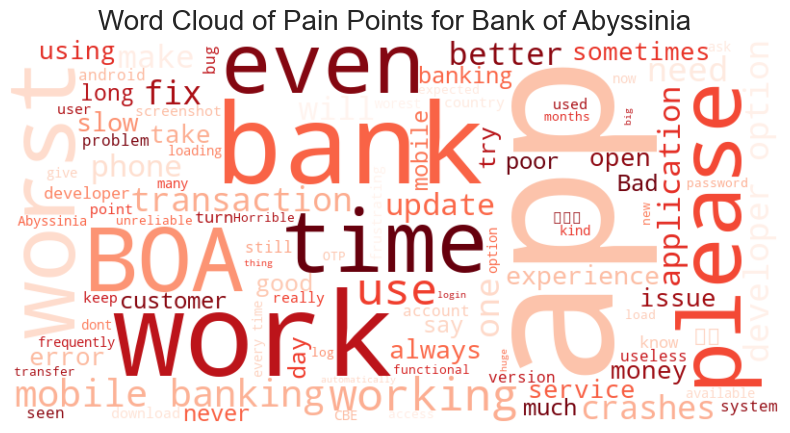

2025-06-07 17:12:37,714 - INFO - Saved word cloud to visuals\4_wordcloud_Dashen_Bank.png


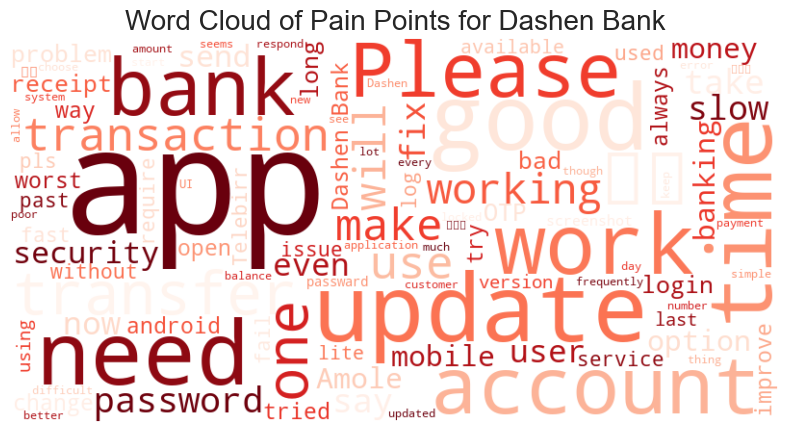

In [6]:
# Plot 3: Word Clouds for Negative Reviews
def generate_word_clouds(df):
    """Generates a word cloud for negative reviews for each bank."""
    banks = df['bank'].unique()
    
    for bank in banks:
        text = " ".join(review for review in df[(df['bank'] == bank) & (df['sentiment_label'] == 'NEGATIVE')]['review'])
        if not text:
            logging.warning(f"No negative reviews to generate word cloud for {bank}.")
            continue
            
        wordcloud = WordCloud(
            background_color="white", width=800, height=400,
            colormap='Reds', max_words=100
        ).generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud of Pain Points for {bank}", fontsize=20)
        
        filepath = os.path.join(OUTPUT_DIR, f"4_wordcloud_{bank.replace(' ', '_')}.png")
        plt.savefig(filepath)
        logging.info(f"Saved word cloud to {filepath}")
        plt.show()

generate_word_clouds(df)

### Insight 3: A Clean UI is a Key Driver of Satisfaction
While not as frequently mentioned as problems, when users leave positive reviews, they often praise ease of use. This is captured in the "UI & User Experience" theme. This shows that users value a straightforward, uncluttered, and intuitive banking experience.

### Insight 4: Competitive Landscape - BOA Leads Slightly in Sentiment
How do the banks compare directly against each other? By plotting the distribution of sentiment scores for each bank, we can gauge the overall user perception. A higher score indicates more positive sentiment.

2025-06-07 17:13:17,810 - INFO - Saved sentiment by bank plot to visuals\2_sentiment_by_bank.png


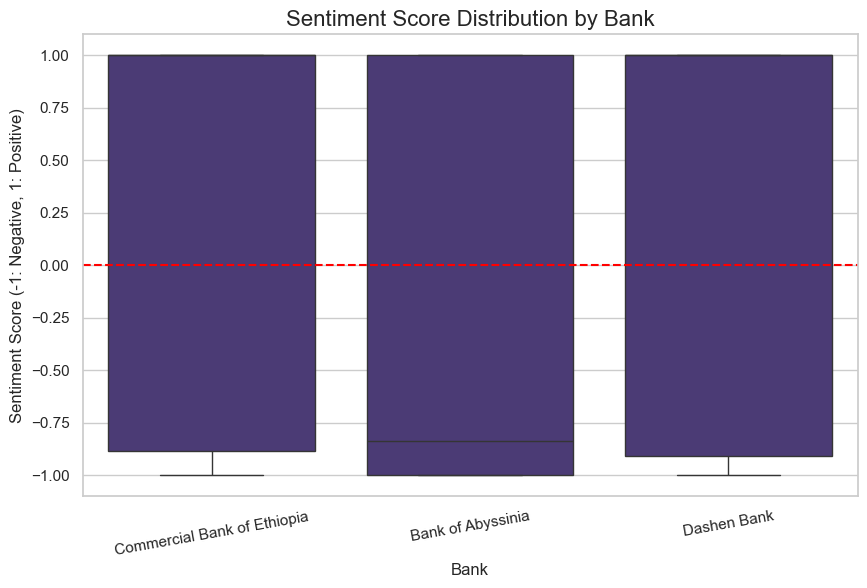

In [8]:
# Plot 4: Sentiment Score Distribution by Bank
def plot_sentiment_by_bank(df):
    """Compares sentiment scores across the three banks using a box plot."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='bank', y='sentiment_score', data=df)
    plt.axhline(0, color='red', linestyle='--') # Add a line at zero for reference
    plt.title("Sentiment Score Distribution by Bank")
    plt.xlabel("Bank")
    plt.ylabel("Sentiment Score (-1: Negative, 1: Positive)")
    plt.xticks(rotation=10)

    filepath = os.path.join(OUTPUT_DIR, "2_sentiment_by_bank.png")
    plt.savefig(filepath)
    logging.info(f"Saved sentiment by bank plot to {filepath}")
    plt.show()

plot_sentiment_by_bank(df)

**Interpretation:** The box plot shows that **Bank of Abyssinia** has a slightly higher median sentiment and a tighter distribution, suggesting a more consistent user experience. CBE and Dashen Bank have a wider range of very low scores, indicating more users are having extremely negative experiences.

---
## Actionable Recommendations

Based on these data-driven insights, here are three strategic recommendations:

#### Recommendation 1: **Prioritize App Stability and Reliability (High Priority)**
- **Action:** Dedicate development sprints to fixing the most common bugs identified in the "Reliability & Bugs" and "Transaction Performance" themes. Implement enhanced QA testing, automated crash reporting, and performance monitoring tools.
- **Justification:** A stable app is table stakes. Fixing these core issues will have the most significant positive impact on user satisfaction across the board and reduce the volume of 1-star reviews.

#### Recommendation 2: **Streamline the Login and OTP Experience**
- **Action:** Conduct a user experience audit of the entire login, password reset, and OTP flow. Investigate the reliability of the OTP delivery system and consider adding alternative authentication methods like biometrics (fingerprint/face ID).
- **Justification:** This directly addresses the "Account & Login Issues" pain point. A seamless login process will reduce user friction and improve overall app accessibility.

#### Recommendation 3: **Invest in Continuous UI/UX Improvements**
- **Action:** Use the positive feedback on "easy" interfaces as a guide. Continue to simplify transaction flows and navigation. Consider adding highly requested features that enhance the user experience, such as a "dark mode" or more detailed transaction history/statements.
- **Justification:** This builds on a known satisfaction driver. A superior UI can become a key reason for users to choose and recommend one banking app over another.

---

### Ethical Considerations & Limitations

It is important to acknowledge potential biases in this analysis:

1.  **Negativity Bias:** Users are often more motivated to leave a review after a negative experience.
2.  **Language Limitation:** This analysis was performed on English-language reviews only, excluding feedback in Amharic or other local languages.
3.  **Platform Bias:** This data is from the Google Play Store (Android users) only and does not reflect the experience of iOS users.

2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


2025-06-07 17:06:58,024 - ERROR - Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.


ERROR: Input file not found: ethiopian_bank_reviews_analyzed.csv. Please run Task 2 first.
